In [42]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt

from textograph.handlers import Text2ImageHandler, Image2ImageHandler
from textograph.indexers import Index
from textograph.models.huggingface import CLIP_Model, FLAVA_Model
from textograph.utils import resize, imread, plot_images_with_titles

from datasets import load_dataset


In [2]:
full_dataset = load_dataset("ceyda/fashion-products-small", split='train')
full_dataset_df = full_dataset.to_pandas()
full_dataset_df.head()

Using custom data configuration ceyda--fashion-products-small-ad468eb94e8d93de
Found cached dataset parquet (C:/Users/user/.cache/huggingface/datasets/ceyda___parquet/ceyda--fashion-products-small-ad468eb94e8d93de/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


filename                                               link     id  \
0  15970.jpg  http://assets.myntassets.com/v1/images/style/p...  15970   
1  39386.jpg  http://assets.myntassets.com/v1/images/style/p...  39386   
2  59263.jpg  http://assets.myntassets.com/v1/images/style/p...  59263   
3  21379.jpg  http://assets.myntassets.com/v1/images/style/p...  21379   
4  53759.jpg  http://assets.myntassets.com/v1/images/style/p...  53759   

  masterCategory gender subCategory  \
0        Apparel    Men     Topwear   
1        Apparel    Men  Bottomwear   
2    Accessories  Women     Watches   
3        Apparel    Men  Bottomwear   
4        Apparel    Men     Topwear   

                                               image  
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...  
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...

In [3]:
def imread_fashion(link):
    idx = int(full_dataset_df[full_dataset_df.link == link].index.values[0])
    return np.asarray(full_dataset[idx]['image'])

In [4]:
model = CLIP_Model()
index_fashion = Index.load_from_path('../data/fashion-products.pickle', distance_metric='cosine')
index_pets = Index.load_from_path('../data/oxford-pets.pickle', distance_metric='cosine')

handler_fashion = Text2ImageHandler(model, index_fashion, imread_func=imread_fashion)
handler_pets = Text2ImageHandler(model, index_pets)

Loading index for  openai/clip-vit-base-patch32
Loading index for  openai/clip-vit-base-patch32


1it [00:02,  2.80s/it]


Request handled in 2.90731660000165 seconds


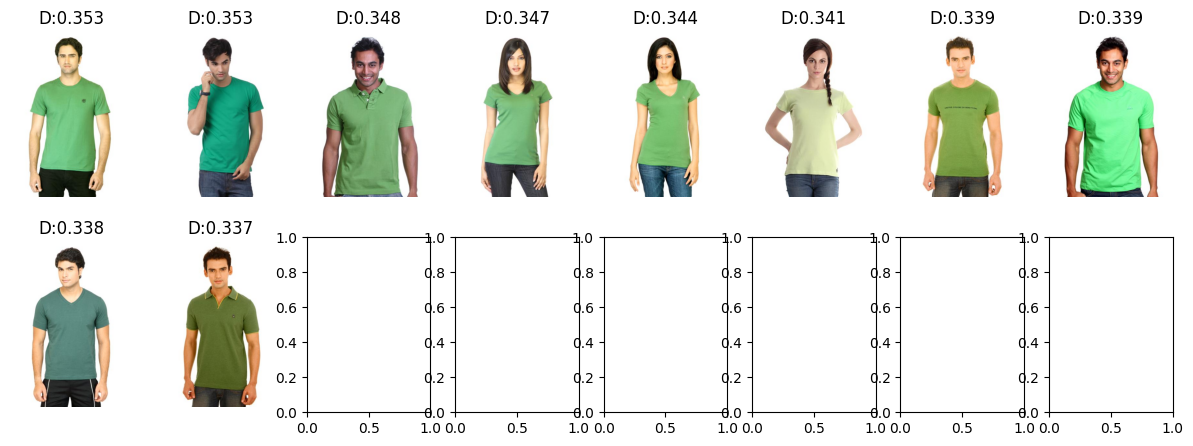

In [5]:
res = handler_fashion("a photo of a green t-shirt")[0]
res.plot_result(top_k=10, imread_func=imread_fashion)

1it [00:04,  4.45s/it]


Request handled in 4.453517300004023 seconds


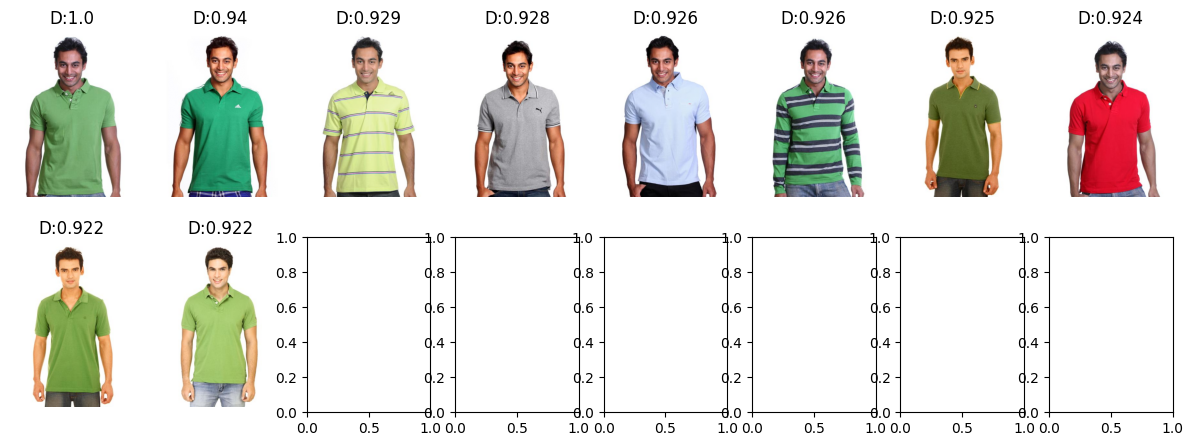

In [6]:
handler_fashion.img2img_on_res(res,2, imread_func=imread_fashion)[0].plot_result(top_k=10, imread_func=imread_fashion)

1it [00:00,  9.03it/s]


Request handled in 0.11711839999770746 seconds


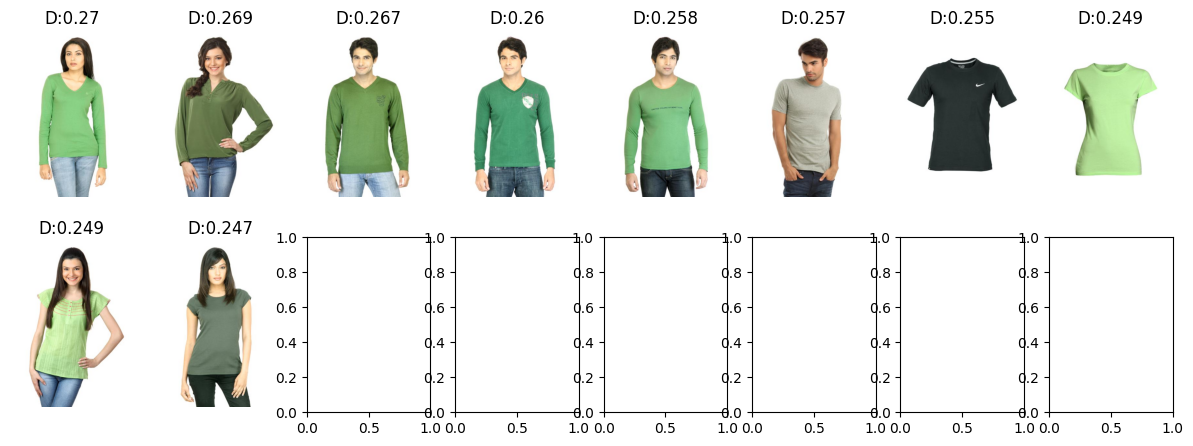

In [7]:
handler_fashion.filter_results(res,"long sleeved")[0].plot_result(top_k=10, imread_func=imread_fashion)

1it [00:00,  2.82it/s]


Request handled in 0.3610675999952946 seconds


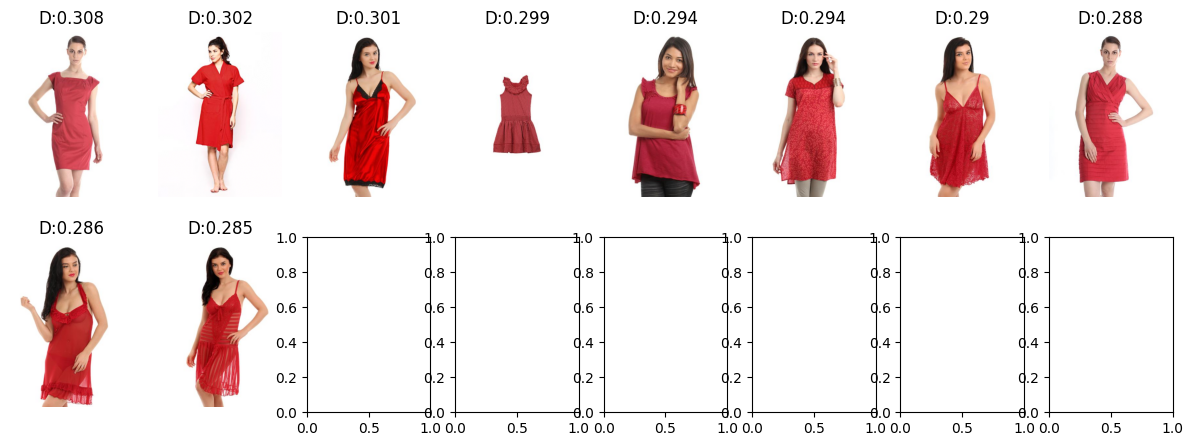

In [8]:
res = handler_fashion("a photo of a red dress")[0]
res.plot_result(top_k=10, imread_func=imread_fashion)

1it [00:00,  7.43it/s]


Request handled in 0.14092499999969732 seconds


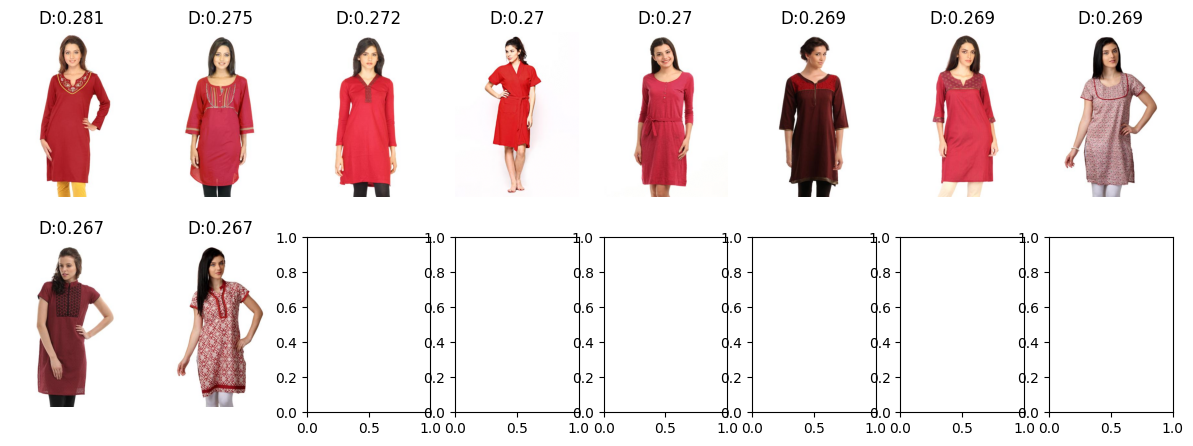

In [9]:
handler_fashion.filter_results(res,"long sleeved dress")[0].plot_result(top_k=10, imread_func=imread_fashion)

1it [00:00,  5.80it/s]


Request handled in 0.17699360000551678 seconds


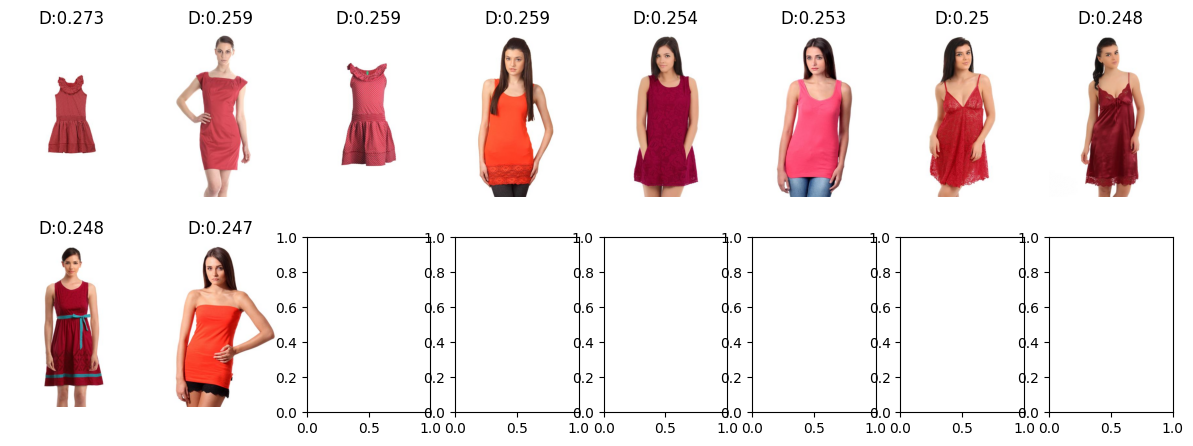

In [10]:
handler_fashion.filter_results(res,"short dress")[0].plot_result(top_k=10, imread_func=imread_fashion)

1it [00:00,  2.97it/s]


Request handled in 0.3434514999971725 seconds


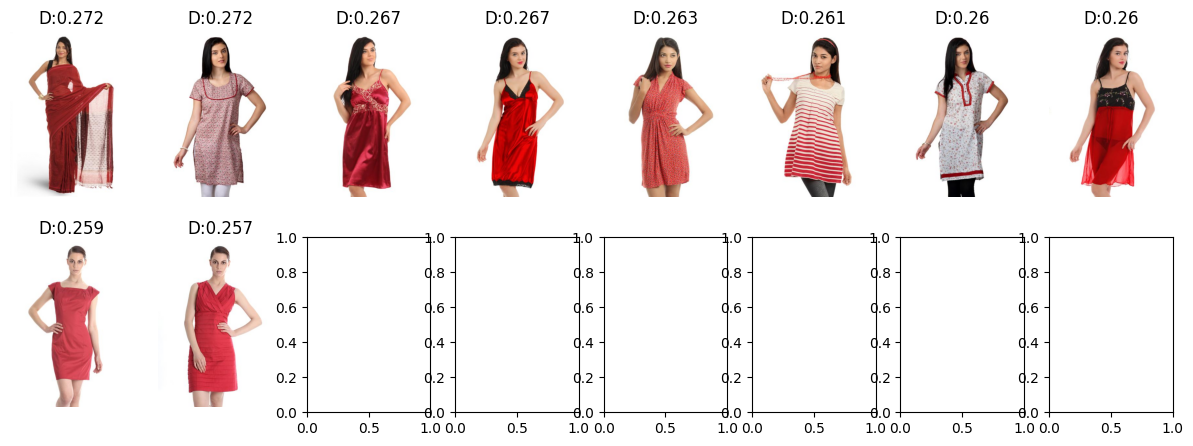

In [11]:
handler_fashion.filter_results(res,"a photo of a long dress")[0].plot_result(top_k=10, imread_func=imread_fashion)

1it [00:04,  4.35s/it]


Request handled in 4.360425999999279 seconds


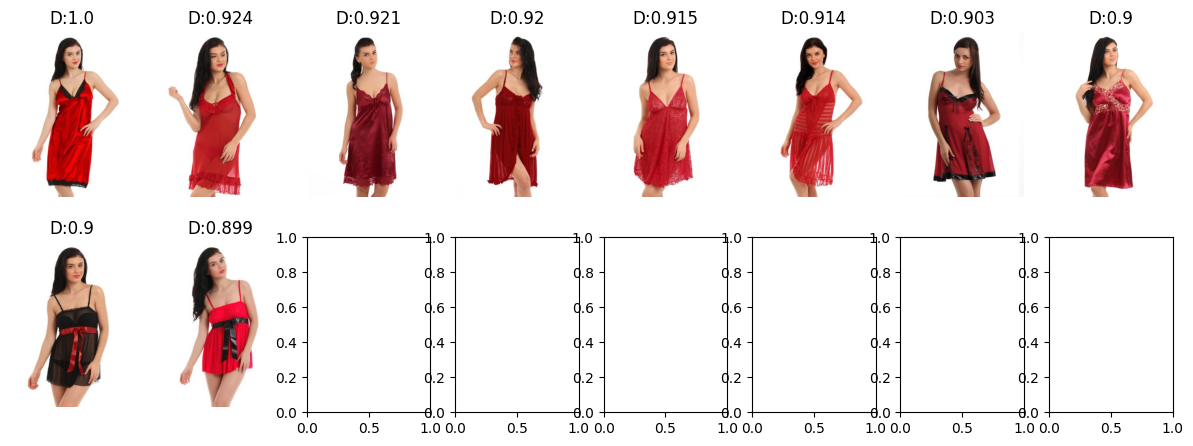

In [12]:
handler_fashion.img2img_on_res(res,2, imread_func=imread_fashion)[0].plot_result(top_k=10, imread_func=imread_fashion)

1it [00:00,  1.41it/s]


Request handled in 0.7124119999934919 seconds


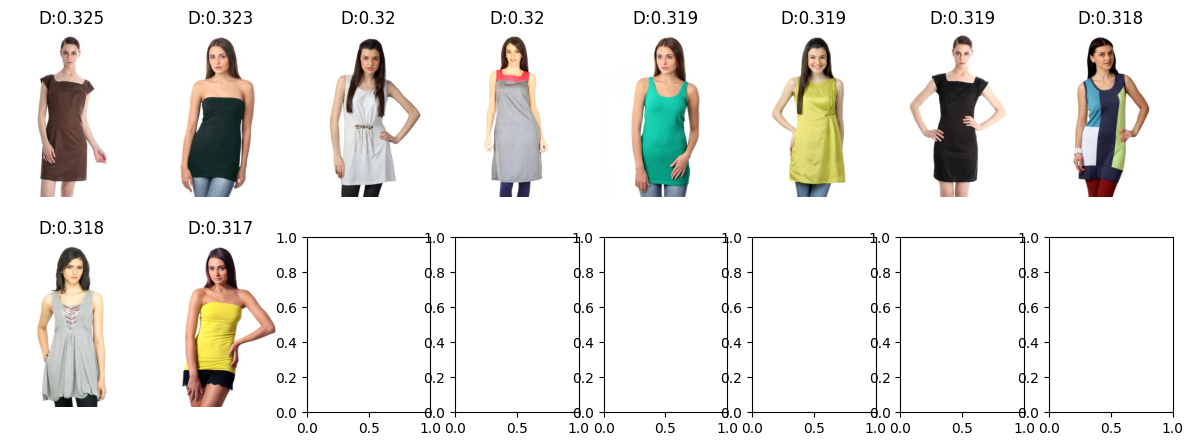

In [13]:
res = handler_fashion("a photo of a sleeveless dress")[0]
res.plot_result(imread_func=imread_fashion)

1it [00:00,  1.62it/s]


Request handled in 0.6222725999978138 seconds


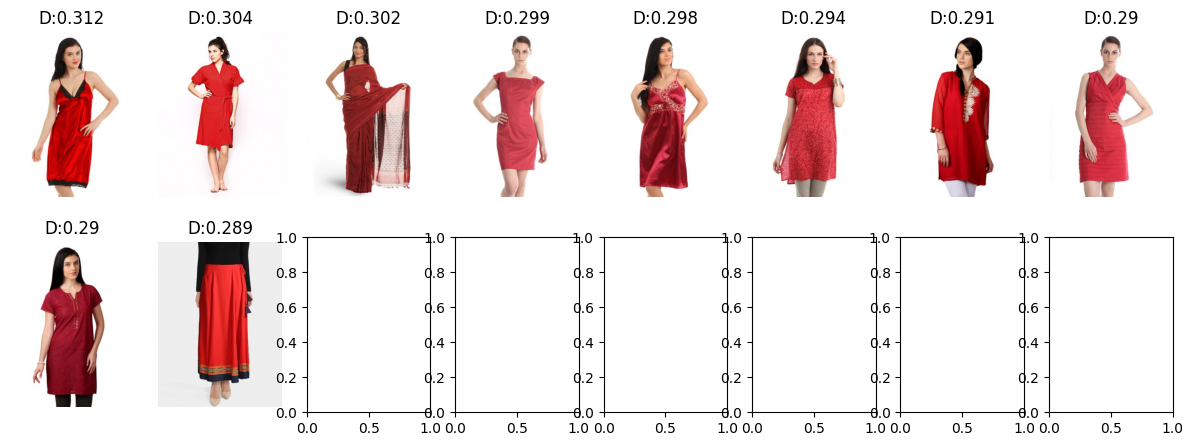

In [14]:
res = handler_fashion("a photo of a red long dress")[0]
res.plot_result(imread_func=imread_fashion)

1it [00:00,  1.92it/s]


Request handled in 0.5260791999899084 seconds


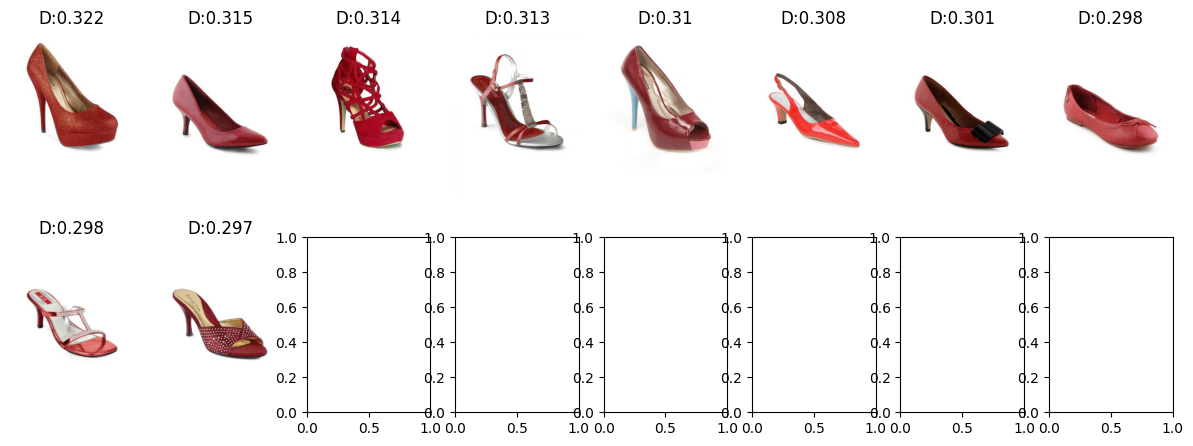

In [15]:
res = handler_fashion("high-heeled red shoes")[0]
res.plot_result(imread_func=imread_fashion)

1it [00:00,  7.60it/s]


Request handled in 0.13843059999635443 seconds


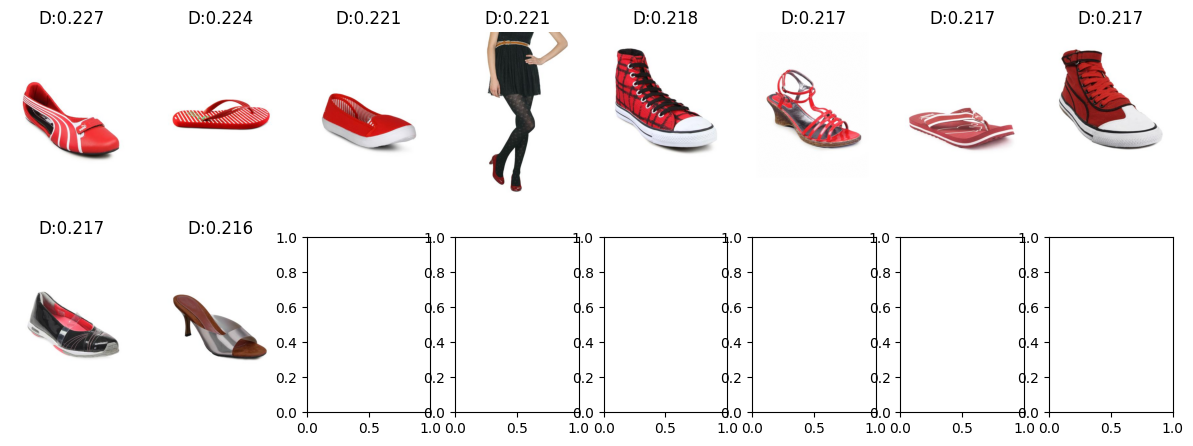

In [16]:
handler_fashion.filter_results(res, "with stripes")[0].plot_result(imread_func=imread_fashion)

In [17]:
from transformers import pipeline
model_checkpoint = "Helsinki-NLP/opus-mt-it-en"
it_en_translator = pipeline("translation", model=model_checkpoint)
it_en_translator("Una foto di un vestito")

c:\Users\user\source\repos\Text2ImageAndBack\Text2ImageAndBack\env\lib\site-packages\transformers\models\marian\tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'A picture of a dress'}]

1it [00:00,  2.58it/s]


Request handled in 0.39249980000022333 seconds


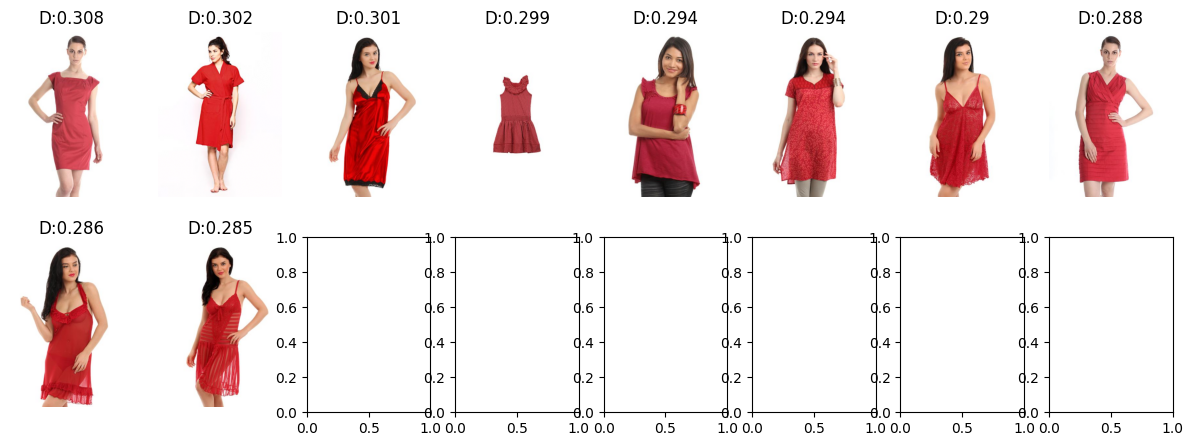

In [19]:
res = handler_fashion(it_en_translator("Una foto di un vestito rosso")[0]['translation_text'])[0]
res.plot_result(imread_func=imread_fashion)

1it [00:00,  1.73it/s]


Request handled in 0.587912699993467 seconds


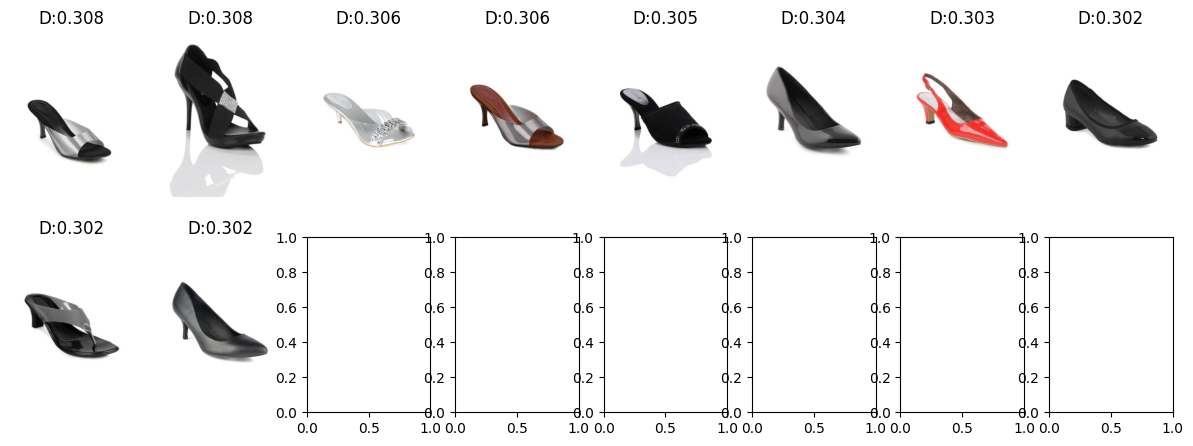

In [20]:
res = handler_fashion(it_en_translator("Una foto di una scarpa con il tacco a spillo")[0]['translation_text'])[0]
res.plot_result(imread_func=imread_fashion)

1it [00:00,  2.05it/s]


Request handled in 0.4928383000078611 seconds


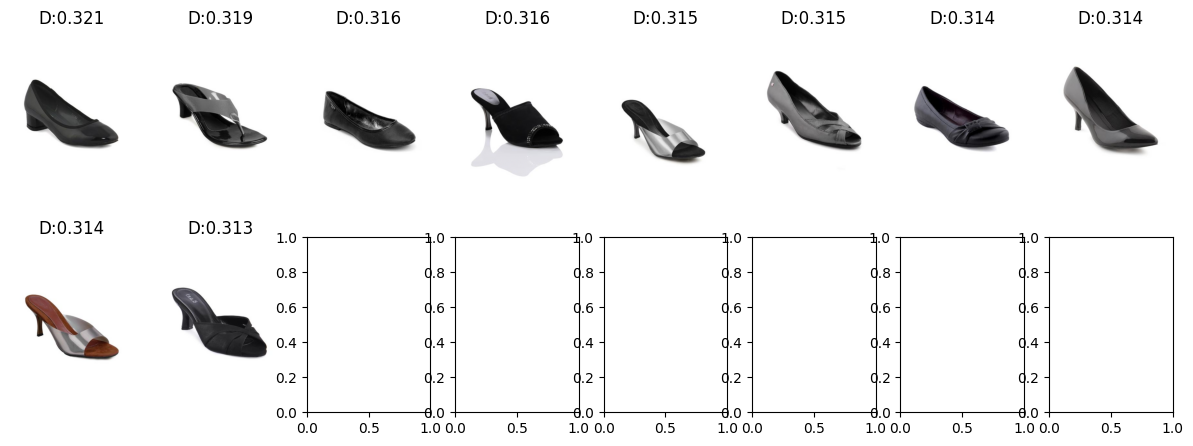

In [27]:
res = handler_fashion(it_en_translator("Una foto di una scarpa con il tacco alto e largo")[0]['translation_text'])[0]
res.plot_result(imread_func=imread_fashion)

1it [00:00,  3.14it/s]


Request handled in 0.32384640000236686 seconds


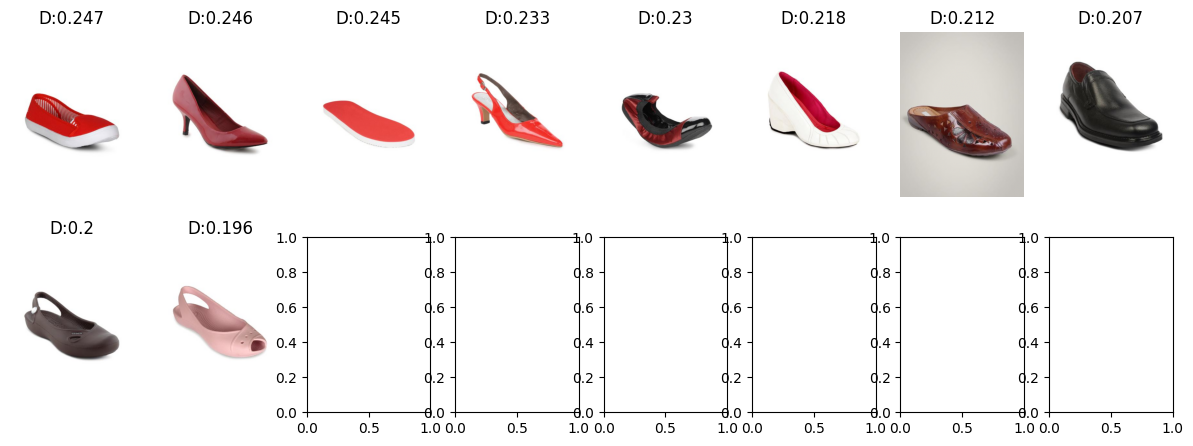

In [29]:
handler_fashion.filter_results(res, it_en_translator("Una foto rossa")[0]['translation_text'])[0].plot_result(imread_func=imread_fashion) # per qualche motivo, scrivere solo "rossa" blocca la traduzione

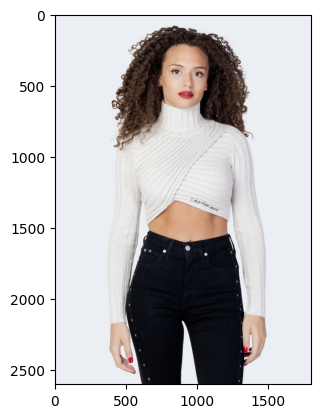

In [58]:
url = 'https://img01.ztat.net/article/spp-media-p1/8c5cafe8fde542aaa3041befead78228/0c84d533518b4890bfe3d92b571b85ac.jpg'
plt.imshow(imread(url))

In [59]:
import cv2

# Draw bounding box definition
def draw_bounding_box(img, score, label, xmin, ymin, xmax, ymax):
	""" Draw a bounding box. """
	# Draw the actual bounding box
	cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255,0,0), 4)

	# Draw the label
	cv2.putText(img,f"{label}: {round(score,2)}",(xmin,ymin+50),1,2,(0,0,0),2,cv2.LINE_AA)
	# Return the intermediate result
	return img

In [60]:
zeroshot_obj = pipeline(task="zero-shot-object-detection")

No model was supplied, defaulted to google/owlvit-base-patch32 and revision 17740e1 (https://huggingface.co/google/owlvit-base-patch32).
Using a pipeline without specifying a model name and revision in production is not recommended.
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


[[{'score': 0.22045710682868958, 'label': 'a photo of a garment', 'box': {'xmin': 508, 'ymin': 1528, 'xmax': 1364, 'ymax': 2605}}, {'score': 0.17276284098625183, 'label': 'a photo of a garment', 'box': {'xmin': 386, 'ymin': 584, 'xmax': 1483, 'ymax': 2594}}, {'score': 0.12308206409215927, 'label': 'a photo of a garment', 'box': {'xmin': 502, 'ymin': 1545, 'xmax': 1346, 'ymax': 2606}}]]


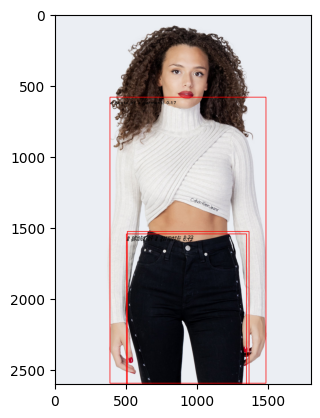

In [61]:
from PIL import Image

image = imread(url)
image_bbox = image.copy()

preds_raw = zeroshot_obj(images=[Image.fromarray(image)], text_queries=['a photo of a garment'])
print(preds_raw)
for i, pred in enumerate(preds_raw[0]):
    image_bbox = draw_bounding_box(image_bbox, pred['score'], pred['label'], **pred['box'])
plt.imshow(image_bbox)
plt.show()


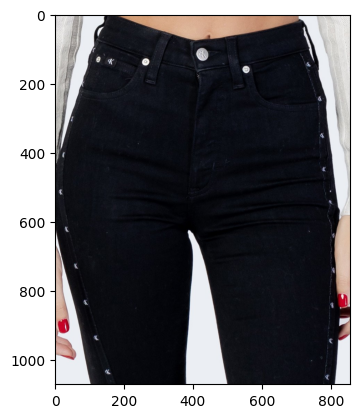

1it [00:00,  1.91it/s]


Request handled in 0.5254112999973586 seconds


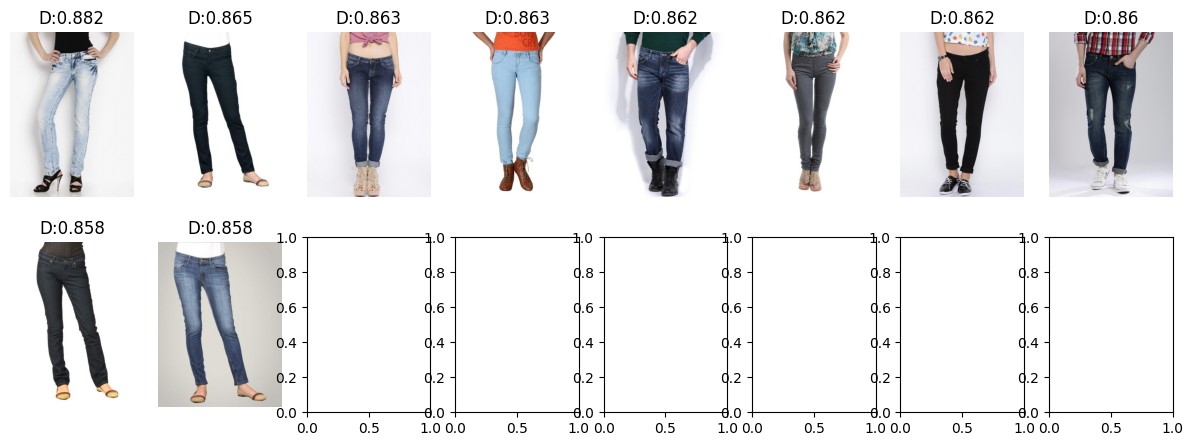

In [62]:
img2img_handler = Image2ImageHandler(CLIP_Model(), index_fashion)

def extract_crop(objdet_pred, image, idx):
    bbox = preds_raw[0][idx]['box']
    return image[bbox['ymin']:bbox['ymax'], bbox['xmin']:bbox['xmax'], :]

crop = extract_crop(preds_raw, image, 0)
plt.imshow(crop)
plt.show()

res_bb = img2img_handler(crop)
res_bb[0].plot_result(imread_func=imread_fashion, top_k=10)

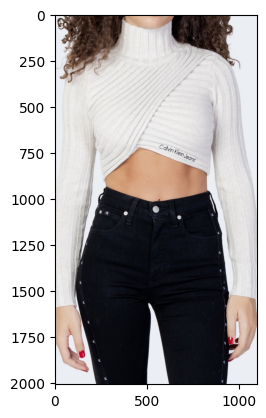

1it [00:00,  1.24it/s]


Request handled in 0.8090654999978142 seconds


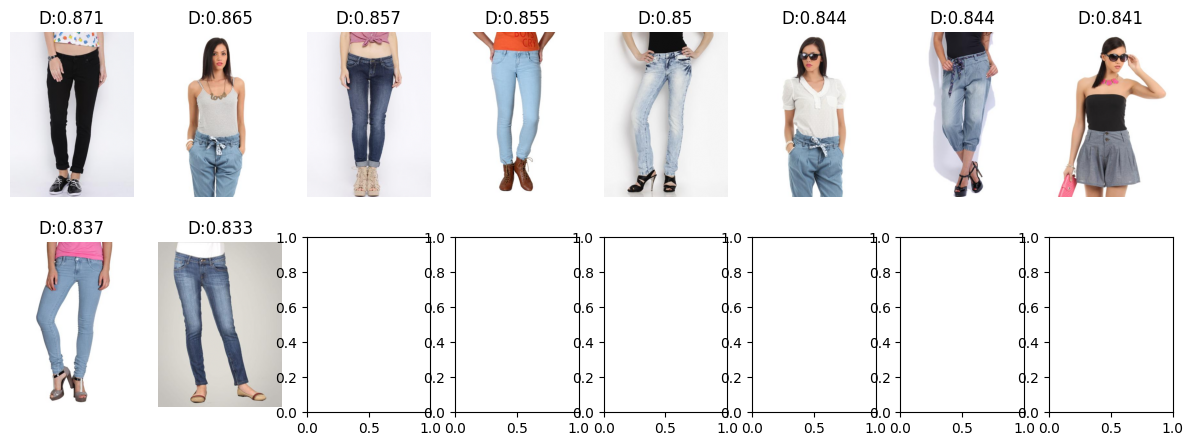

In [63]:
crop = extract_crop(preds_raw, image, 1)
plt.imshow(crop)
plt.show()

res_bb = img2img_handler(crop)
res_bb[0].plot_result(imread_func=imread_fashion, top_k=10)

1it [00:00,  7.32it/s]


Request handled in 0.1401783999899635 seconds


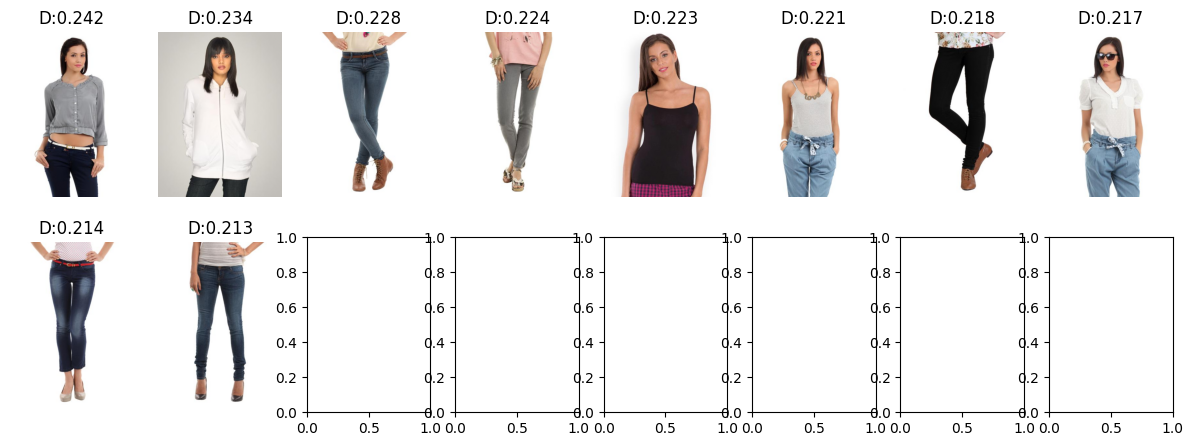

In [68]:
handler_fashion.filter_results(res_bb[0], "a sweater")[0].plot_result(imread_func=imread_fashion)